# Structure de données relationelles : les graphes

## 1. Rappel de cours et exemples

Il existe différents types de graphe.

## Graphe non orienté
#### Définitions
Avant de s'intéresser à l'implémentation des graphes, voici quelques  définitions qui nous seront utiles par la suite :  
* Une **chaine** est une **suite de sommets consécutifs** dans un graphe, un peu comme si on se promenait sur le graphe. On la désigne par les lettres des sommets qu'elle comporte. Une **chaine** est dite **élémentaire** si elle ne comporte pas plusieurs fois le même sommet.  
* Un **cycle** est une **chaine qui commence et se termine au même sommet**.  
* Deux sommets reliés par une arête sont dits **adjacents** .
* **l'ordre** ou la **taille** d'un graphe est le **nombre de ses sommets** .  

Par exemple, dans le graphe ci-dessous :
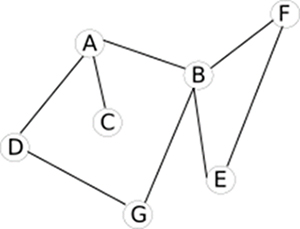

On observe:  
* des chaines : `ABGDAC` ; `FBGDAB`;  
* des chaines élémentaire `CADGBEF` etc.  
* des cycles : `BFEB` ; `ABEGDA`  
* `A` et `B` sont adjacents, de même que `F` et `E` etc.

## Graphe orienté
Dans un graphe orienté, les **arêtes possèdent une orientation**. Ces "arêtes orientées" sont souvent appelées **"arcs"** et on les représente par des **flèches**.  

Dans un graphe orienté :  
* On appelle **chemin** toute suite de sommets consécutifs reliés par des arcs. Un **chemin** est dit **élémentaire** s'il ne comporte pas plusieurs fois le même sommet.  
* Un chemin dont le sommet du début est le même que celui de la fin est appelé un **circuit** .  
* Dans ce cas la notion de sommets adjacents n'est pas assez précise, il faut tenir compte de l'orientation. On définit qu'un **sommet X est adjacent d'un sommet Y** si il existe un **arc allant de Y vers X**.  
Dans le graphe ci-dessous, B et F sont adjacents à E mais E n'est pas adjacent à B

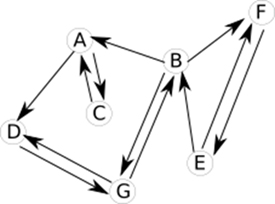

## Graphe pondéré orienté ou non orienté
Parfois il est intéressant d'associer aux arrêtes ou aux arcs des **valeurs**, on parle alors de **graphes pondérés**. Il est possible d'associer à chaque arête la distance en Km ou la durée du trajet entre les 2 lieux :
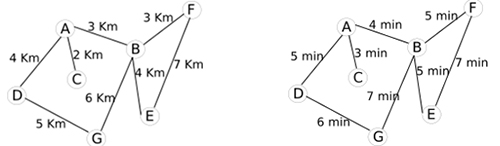

## Implémentation
### A l'aide d'une matrice d'adjacence
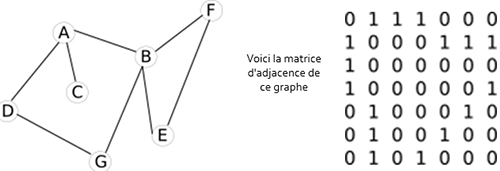

Chaque ligne et chaque colonne représente un sommet. Ici la 1ère ligne (et la 1ère colonne) représente le sommet A.  
Si il existe une liaison entre le sommet A et un autre sommet , on place la valeur 1, sinon on laisse 0.  

De même pour un graphe pondéré, on remplace les 1 par la valeur de pondération.  
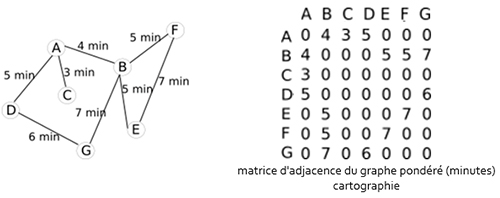

Il est assez simple d'utiliser les matrices d'adjacence en Python grâce aux **listes de liste**  

Exemple: La matrice  
$ 
M_1 =\pmatrix{
    0&1&1&1&1\\
    1&0&1&0&0\\
    1&1&0&1&0\\
    1&0&1&0&1\\
    1&0&0&1&0\\
    }
$
, associée au graphe

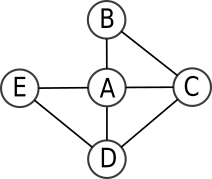

sera représentée par la variable `G` suivante :

```python
G =  [[0, 1, 1, 1, 1],
      [1, 0, 1, 0, 0],
      [1, 1, 0, 1, 0],
      [1, 0, 1, 0, 1],
      [1, 0, 0, 1, 0]]
```

### A l'aide de listes d'adjacence
Il s'agit d'une autre méthode pour implémenter les graphes.  
Pour commencer, on définit une liste des sommets du graphe.   
À chaque élément de cette liste, on associe une autre liste qui contient les sommets liés à cet élément (sommets adjacents).  

On utilise pour cela un **dictionnaire** dont les **clés sont les sommets** et les **valeurs les listes des voisins**.

Dans le cas d'un graphe orienté on associe à chaque sommet la liste des successeurs (ou bien des prédécesseurs, au choix).

Par exemple, le graphe

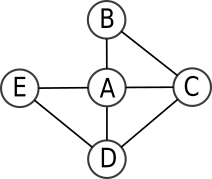

sera représenté par le dictionnaire :

```python
G = {'A': ['B', 'C', 'D', 'E'],
     'B': ['A', 'C'],
     'C': ['A', 'B', 'D'],
     'D': ['A', 'C', 'E'],
     'E': ['A', 'D']
    }
```

## 2. Algorithmes à connaître sur les graphes
### Parcourir un graphe

Tout comme pour les arbres, il existe plusieurs façons de parcourir les sommets en suivant les arêtes d'un graphe.  
On peut choisir d'avancer en passant en revue les voisins directs dans un premier temps, puis les voisins des voisins dans un second temps, et ainsi de suite.  
Ou au contraire, choisir d'avancer en passant par le premier sommet voisin disponible.  

Dans tous les cas il faut veiller **à ne pas repasser par des sommets déjà parcourus** .  
Aussi, il est nécessaire de **marquer les sommets rencontrés au cours de l'exploration du graphe** .  

C'est une différence par rapport aux parcours des arbres ou la récursivité permettait d'avancer de branche en branche dans le cas d'un parcours en profondeur.  

Dans le cas d'une matrice d'adjacence, on peut noter le marquage à <b>l'intersection ligne-colonne pour le même sommet</b>. A ce niveau on placait des 'O', il suffit d'y placer la marquage choisi.<br/>
Dans l'exemple ci-dessous, aucun sommet n'est encore visité sauf le sommet A, le marquage choisi est une couleur.

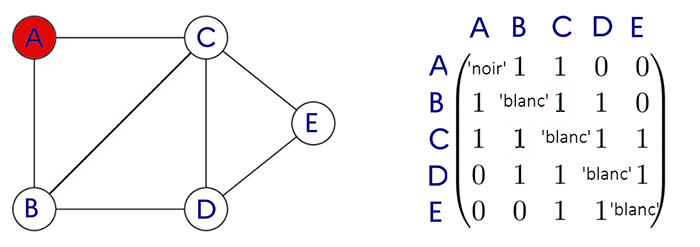

Tous les parcours suivent plus ou moins le même algorithme de base :
<summary style="border:1pt solid #FE2E2E; border-radius:5pt; width:95%; color:black; padding:3px; background-color: white ; cursor: pointer;" > 

* On visite un sommet `A` . On crée une structure `St` qui contiendra au départ l’ensemble des voisins de `A` .

* Tant que `St` n’est pas vide :

  *  on choisit un sommet `S` de `St`
  *  on visite `S`
  *  on ajoute à `St` tous les voisins de `S` pas encore visités


</summary>

Le choix de la structure de l'ensemble `St` est prépondérant:

* Si on choisit une **file** (FIFO): on visitera les sommets dans l'ordre d'arrivée, donc les plus proches du sommet précédent. On obtient donc un **parcours en largeur** ➡ **BFS**.  
* Si on choisit une **pile** (LIFO): on visitera d'abord les derniers sommets arrivés, donc on parcourt le graphe en visitant à chaque étape un voisin du précédent. On obtient donc un **parcours en profondeur** ➡ **DFS**.

### Parcours en largeur (BFS - Breadth-First Search)  

Le parcours en largeur consiste a examiner les sommets voisins puis les voisins des voisins et ainsi de suite.  
Il procède ainsi par éloignement progressif depuis le sommet de départ.  

Un sommet `u` sera adjacent avec un sommet `v` si `u` et `v` sont reliés par une **arête** (on pourra aussi dire que `u` et `v` sont **voisins**) 

Ci-dessous, voici l'algorithme de parcours en largeur.

    VARIABLES
    Entrées : G : un graphe et s : sommet(origine)
    Sortie : Affiche tous les sommets du graphe G
    u : sommet
    v : sommet
    f : file (initialement vide), c'est notre structure St.
    # On part du principe que pour tout sommet u du graphe G, u.couleur = blanc à l'origine
    DEBUT
    s.couleur ← noir
    enfiler (s,f)
    tant que f non vide :
        u ← defiler(f)
        afficher u
        pour chaque sommet v non marqué voisin du sommet u :
            v.couleur ← noir
                enfiler(v,f)
    FIN

### Parcours en profondeur (DFS - Depth-First Search)

Une fois établi le sommet de départ, le parcours en profondeur consiste à avancer tant que cela reste possible, ainsi à chaque étape on passe par le  dernier voisin qui se présente et qui n'a pas encore été parcouru (marqué).  
On utilise le même système de marquage des sommets visités.

Si vous avez bien compris, dans le parcours en largeur, on enfilait les sommets visités, puis on les défilait. Ainsi, on examinait le 1er voisin rencontré, puis le second etc.  

Dans ce parcours, on va examiner le dernier sommet rencontré. On va donc changer la structure qui devient une pile.  
On va donc dépiler le dernier sommet rencontré (et non pas défiler le 1er sommet rencontré)

Ci-dessous, voici l'algorithme de parcours en profondeur (version itérative).

    VARIABLES
    Entrées : G : un graphe et s : nœud ou sommet(origine)
    Sortie : Affiche tous les sommets du graphe G
    u : nœud
    v : nœud
    p : pile (initialement vide)
    # On part du principe que pour tout sommet u du graphe G, u.couleur = blanc à l'origine
    DEBUT
    s.couleur ← noir
    empiler (s,p)
    tant que p non vide :
        u ← depiler(p)
        afficher u
        pour chaque sommet v non marqué voisin du sommet u :
            v.couleur ← noir
                empiler(v,p)
    FIN

Il existe une version récursive de cet algorithme : 

    VARIABLES
    Entrées : G : un graphe et s : nœud ou sommet(origine)
    Sortie : Affiche tous les sommets du graphe G
    u : nœud
    v : nœud
    # On part du principe que pour tout sommet u du graphe G, u.couleur = blanc à l'origine
    DEBUT
    PARCOURS-PROFONDEUR(G,u) :
    u.couleur ← noir
    pour chaque sommet v adjacent au sommet u :
        si v.couleur n'est pas noir :
            PARCOURS-PROFONDEUR(G,v)
    FIN

Notez l'extrème simplicité de cet algorithme. 

Le parcours en profondeur est un parcours où on va aller «le plus loin possible» sans se préoccuper des autres voisins non visités : on va visiter le premier de ses voisins non traités, qui va faire de même, etc. Lorsqu'il n'y a plus de voisin, on revient en arrière pour aller voir le dernier voisin non visité.  
C'est un parcours qui s'écrit naturellement de manière récursive 

### La recherche de cycle
Pour différentes raisons, il peut être intéressant de détecter la présence d'un ou plusieurs cycles dans un graphe (par exemple pour savoir s'il est possible d'effectuer un parcours qui revient à son point de départ sans être obligé de faire demi-tour)  

Voici l'algorithme permettant de détecter un cycle dans un graphe  

    VARIABLES
    s : nœud (nœud quelconque : nœud de départ)
    G : un graphe
    u : nœud
    v : nœud voisin
    P : pile (vide au départ)
    M : liste des sommets marqués
    DEBUT CYCLE
    empiler(s,P)
    tant que P n'est pas vide :
        u ← depiler(P)
        si u est dans M
            renvoie Vrai
        empiler(u,M)
        pour chaque sommet v voisin du sommet u :
            si v n'est pas dans M
                    empiler(v,P)
        
     renvoie Faux
     FIN

## 3. Exercices type épreuve pratique

<div class="alert alert-info"><b>Exercice 1</b><br/>

Dans cet exercice, on considère un graphe non orienté représenté sous forme de listes
d’adjacence. On suppose que les sommets sont numérotés de 0 à n-1.  
Ainsi, le graphe suivant:  
    
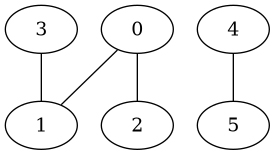
    
sera représenté par la liste d’adjacence suivante:
```python
adj = [[1, 2], [0, 3], [0], [1], [5], [4]]
```
    
On souhaite déterminer les sommets accessibles depuis un sommet donné dans le graphe.  
Pour cela, on va procéder à un parcours en profondeur du graphe.  
    
Compléter la fonction suivante.

In [ ]:
def parcours(adj, x, acc):
    '''Réalise un parcours en profondeur récursif
    du graphe donné par les listes d'adjacence adj
    depuis le sommet x en accumulant les sommets
    rencontrés dans acc'''
    if x ...:
        acc.append(x)
        for y in ...:
            parcours(adj, ...)

def accessibles(adj, x):
    '''Renvoie la liste des sommets accessibles dans le
    graphe donné par les listes d'adjacence adj depuis
    le sommet x.'''
    acc = []
    parcours(adj, ...)
    return acc

accessibles([[1, 2], [0], [0, 3], [1], [5], [4]], 0)

<div class="alert alert-info">
    
Exemples :
    
```python
>>> accessibles([[1, 2], [0], [0, 3], [1], [5], [4]], 0)
[0, 1, 2, 3]
>>> accessibles([[1, 2], [0], [0, 3], [1], [5], [4]], 4)
[4, 5]
```

<details>
<summary style="border:1pt solid #FE2E2E; border-radius:5pt; width:15%; color:black; padding:3px; background-color: white ; cursor: pointer;" > Réponse </summary>  
    
<div> 
<code>
    
def parcours(adj, x, acc):
    '''Réalise un parcours en profondeur récursif
    du graphe donné par les listes d'adjacence adj
    depuis le sommet x en accumulant les sommets
    rencontrés dans acc'''
    if x not in acc:
        acc.append(x)
        for y in adj[x]:
            parcours(adj, y, acc)

def accessibles(adj, x):
    '''Renvoie la liste des sommets accessibles dans le
    graphe donné par les listes d'adjacence adj depuis
    le sommet x.'''
    acc = []
    parcours(adj, x, acc)
    return acc
    
</code>
</div>

<div class="alert alert-info"><b>Exercice 2</b><br/>
    
On considère dans cet exercice un graphe orienté représenté sous forme de listes d’adjacence.
On suppose que les sommets sont numérotés de 0 à n-1.
Par exemple, le graphe suivant:  
    
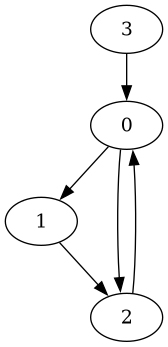
    
est représenté par la liste d’adjacence suivante:
```python
adj = [[1, 2], [2], [0], [0]]
```
    
Écrire une fonction `voisins_entrants(adj, x)` qui prend en paramètre le graphe donné sous forme de liste d’adjacence et qui renvoie une liste contenant les voisins entrants du sommet x, c’est-à-dire les sommets y tels qu’il existe une arête de y vers x.  
Exemples:  
```python
>>> voisins_entrants([[1, 2], [2], [0], [0]], 0)
[2, 3]
>>> voisins_entrants([[1, 2], [2], [0], [0]], 1)
[0]    
```

<details>
<summary style="border:1pt solid #FE2E2E; border-radius:5pt; width:15%; color:black; padding:3px; background-color: white ; cursor: pointer;" > Réponse </summary>  
    
<div> 

<code>

def voisins_entrants(adj, x):
    res = []
    for i in range(len(adj)):
        if x in adj[i]:
            res.append(i)
    return res
voisins_entrants([[1, 2], [2], [0], [0]], 1) 
    
</code>
</div>

## Exercices type épreuve écrite

<div class = "alert alert-block alert-warning"><b>Exercice 1</b>
    
Les parties A, B et C sont indépendantes.  
    
Franck joue en ligne sur internet. Ce jeu est programmé en Python.  
    
**Partie A**
Dans ce jeu Franck incarne un personnage qui doit parcourir des niveaux et tuer des monstres.  
Afin de stocker les informations relatives au personnage, le jeu utilise des dictionnaires.  

Dont voici un exemple en début de partie :  
```python
Joueur1= {’nom’:’Franck ’, ’score ’:0 , ’pv ’:24}
```
    
Ici le personnage nommé Franck n’a pas encore ajouté de points à son score et n’a pas encore perdu de point de vie.  
1.  
a. Donner la commande Python permettant d’accéder au point de vie du joueur 1.  
b. Au début du jeu, le joueur trouve une arme permettant d’infliger des dégâts aux monstres qu’il rencontrera plus tard.  
Donner une commande python à entrer dans la console permettant d’ajouter un attribut `degat` au `Joueur1` avec une valeur de `3`.
```python    
Joueur1= {’nom’:’Franck ’, ’score ’:0 , ’pv’:24 , ’degat ’:3}
```

Les monstres affrontés par Franck sont également représentés par des dictionnaires.  
```python   
Monstre1 = {’nom’:’ Fracula’, ’degat ’:2 , ’pv’:5}
```

2. À chaque fois qu’un joueur tue un monstre, il marque un point à son score.  
Donner, sans faire de fonction, une commande permettant d’ajouter `1` point à l’attribut `score` du joueur 1.  
    
3. Pour savoir si un personnage joueur ou monstre est mort, le jeu dispose d’une fonction `est_mort` qui prend en paramètre un personnage et renvoie un Booléen : vrai si les points de vie du personnage sont inférieurs à zéro et faux sinon.  
Donner une implémentation de la fonction `est_mort`.  
    
4. Lorsqu’un joueur frappe un ennemi, une fonction `frappe` qui prend en paramètre un joueur et un monstre met à jour les points de vie du monstre en enlevant le nombre associé aux dégâts que peut faire le joueur.  
On ne s’interrogera pas ici sur le cas où les points de vies deviendraient négatifs.  
Écrire la fonction `frappe`
    
**Partie B**  
Dans ce jeu vidéo, Franck circule dans des catacombes.  
Il a représenté ci-contre le graphe modélisant ces catacombes.  
Les sommets représentent les salles et les arêtes représentent les couloirs.  
Au début du jeu l’avatar de Franck est dans la salle A.  
    
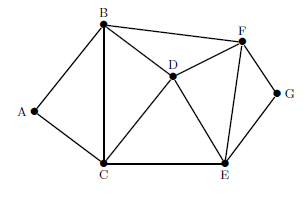
    
1. Quel est l’ordre de ce graphe ?  
2. Ce graphe est-il connexe ?  
3. Lister dans un tableau le degré de chaque sommet.  
4. En déduire le nombre d’arêtes qui le compose.  
5. Franck souhaite parcourir toutes les salles. Pour cela il souhaite réaliser le parcours en profondeur de ce graphe.  
Donner sans justification les salles qu’il visitera dans l’ordre.  
On prendra les sommets par ordre alphabétique.  
6. Donner la liste d’adjacence de ce graphe.

<div class = "alert alert-block alert-warning">
    
**Partie C**  
Les catacombes infestées de monstres qu’il doit combattre.  
Après avoir parcouru tous les couloirs, il a rajouté ci-contre l’information suivante :  
Les étiquettes du graphe correspondent au nombre de monstres présents dans chaque couloir.  
    
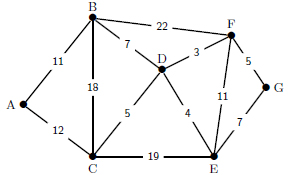
    
Pour charger les couloirs ainsi que les monstres, il utilise la matrice d’adjacence suivante :

<div class = "alert alert-block alert-warning">
    
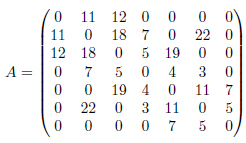
    
    
On rappelle qu’en python une telle matrice se programme par :  
```python
A= [[0 ,11 ,12 ,0 ,0 ,0 ,0] ,[11 ,0 ,18 ,7 ,0 ,22 ,0] ,[12 ,18 ,0 ,5 ,19 ,0 ,0] ,[0 ,7 ,5 ,0 ,4 ,3 ,0] ,
[0 ,0 ,19 ,4 ,0 ,11 ,7] ,[0 ,22 ,0 ,3 ,11 ,0 ,5] ,[0 ,0 ,0 ,0 ,7 ,5 ,0]]
```

1. Écrire en python la commande permettant de renvoyer le nombre de monstres dans le couloir joignant les salles C et D.  
2. On souhaite réaliser une fonction python qui donne le nombre total de monstres présents dans ce niveau du jeu.  
a. La fonction `nb_monstre` prend en paramètre une matrice et renvoie un entier.  
Donner une implémentation de cette fonction.  
    
b. Que retourne l’instruction `nb_monstre(A)` ?  
    
3. Franck débute le jeu dans la salle A et doit atteindre l’adversaire final en salle G.  
Il souhaite, pour ce faire, croiser le moins de monstres possible.  
En exécutant un algorithme, déterminer ce trajet minimal et préciser le nombre de monstres affrontés.  
 

<details>
<summary style="border:1pt solid #FE2E2E; border-radius:5pt; width:15%; color:black; padding:3px; background-color: white ; cursor: pointer;" > Réponse </summary>  
    
<div>
    
```python
### Partie A

Joueur1= {'nom':'Franck', 'score':0 , 'pv':24} 

Joueur1.values()
# 1.a. 

print(Joueur1['pv'])
#print(Joueur1.value('pv'))
# 1.b 

Joueur1['degat'] = 3
Joueur1.values('degat') = 3

print(Joueur1)

Monstre1 = {'nom':'Fracula', 'degat':2 , 'pv':5}

# 2
Joueur1['score'] += 1
#Joueur1['score'] = Joueur1['score'] + 1

#3
def est_mort(personnage):
    return personnage['pv'] < 1
    # return personnage['pv'] <= 0

# 4

def frappe(joueur,monstre):
    monstre['pv'] -= joueur['degat']
    #monstre['pv'] = monstre['pv'] - joueur['degat']


frappe(Joueur1,Monstre1)
print(Monstre1)


### Partie B

# 1
# L'ordre de ce graphe est de 7.

# 2
# Le graphe est connexe il existe un chemin permettant de rallier deux sommets distincts

# 3
# -----------------------------
# | A | B | C | D | E | F | G |
# -----------------------------
# | 2 | 4 | 4 | 4 | 4 | 4 | 2 |
# -----------------------------

# 4
# Le nombre d'arêtes se calcule (2+4+4+4+4+4+2)/2 = 24/2=12
# Le graphe est composé de 12 arêtes.

# 5
# Le parcours en profondeur : A C E G F D B

# 6
Graphe = {'A':['B','C'] , 'B':['A','C','D','F'], 
'C':['A','B','D','E'],'D':['B','C','E','F'],
'E':['C','D','F','G'],'F':['B','D','E','G'],'G':['E','F']}

### Partie C

# 1
A= [[0,11,12,0,0,0,0],[11,0,18,7,0,22,0],[12,18,0,5,19,0,0],
[0,7,5,0,4,3,0],[0,0,19,4,0,11,7],[0,22,0,3,11,0,5],[0,0,0,0,7,5,0]]

A[2][3]
A[3][2]

# 2
def nb_monstres(matrice):
    nombre = 0
    for ligne in matrice:
        for couloir in ligne:
            nombre += couloir
    return nombre //2

print(nb_monstres(A))

# 3
# c'est en fait l'algorithme de Dijkstra sans le dire.
# A chaque sommet on choisit le plus petit nombre de monstre sur une arête. Si pour joindre un sommet
# il existe un chemin avec moins de monstres, on doit en tenir compte. Ex : pour arriver en D, il vaut mieux passer
# par C car ACD : 17 alors que ABD : 18
# ici le chemin sera A - C - D - F - G : 25 monstres
```
</div>

<div class = "alert alert-block alert-warning"><b>Exercice 2</b>
    
On suppose que l’on dispose de l’interface suivante pour modéliser la structure abstraite de graphe non orienté : 
    
**Interface de la structure abstraite de graphe non orienté**  
    
* `creer_graphe_vide()` : renvoie un graphe vide.  
* `liste_sommets(G)` : renvoie la liste des sommets du graphe `G`.
* `liste_voisins(G,s)` : renvoie la liste des sommets voisins du sommet `s` dans le graphe `G`.
* `sont_voisins(G, s1, s2)` : renvoie `True` si les sommets `s1` et `s2` sont voisins dans le graphe `G`, et `False` sinon.
* `ajouter_sommet(G,s)` : ajoute le sommet `s` au graphe `G`, sans le relier à un autre sommet (cette fonction ne renvoie rien, elle modifie en place le graphe `G`).
* `ajouter_arete(G, s1, s2)` : ajoute une arête entre les sommets `s1` et `s2` du graphe `G`, à condition qu’une telle arête n’existe pas déjà (si l’arête existe déjà, la fonction ne fait rien; et cette fonction ne renvoie rien, elle modifie en place le graphe `G`).  
    
La fonction Python `taille(G)` ci-dessous prend en paramètre un graphe `G` et renvoie la taille du graphe.
```python
def taille(G) :
    return len(liste_sommets(G))
```
    
1. Écrire en Python le code d’une fonction `degré(G, s)` qui prend en paramètres un graphe `G` et un de ses sommets `s` et qui renvoie le degré du sommet `s` dans le graphe `G`, c’est-à-dire le nombre d’arêtes qui ont `s` comme extrémité.  
    
Étant donné un graphe non orienté `G`, on appelle complémentaire de `G`, et on note $\overline{G}$ , le graphe non orienté tel que :  
* ses sommets sont les mêmes que ceux de `G` ;
* deux sommets `𝑠1` et `𝑠2` sont voisins dans $\overline{G}$ si et seulement si `𝑠1` et `𝑠2` ne sont pas voisins dans `G`.  

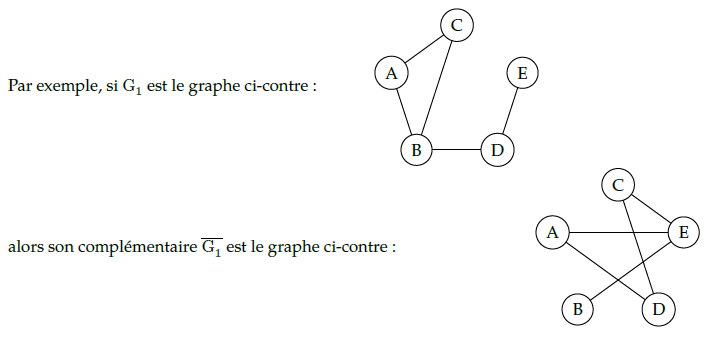

<div class = "alert alert-block alert-warning">  
    
2. Tracer le complémentaire du graphe G2 représenté ci-dessous :  

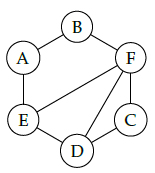

<div class = "alert alert-block alert-warning">    
3. On veut coder en Python la création du complémentaire d’un graphe G.  
Écrire le code d’une fonction `complementaire(G)` qui prend en paramètre un graphe `G` et qui renvoie son complémentaire.  
    
On pourra suivre la démarche suivante :  
* on crée un graphe vide;
* on y ajoute tous les sommets du graphe `G` ;
* pour tout sommet `s1` de `G` et tout sommet `s2` de `G`, si `s1` et `s2` sont distincts et qu’ils ne sont pas voisins dans `G`, on ajoute une arête entre `s1` et `s2` dans le nouveau graphe.  
    
4. Étant donné un graphe `G` et un de ses sommets `s`, indiquer lequel des trois booléens `b1`, `b2` ou `b3` est évalué en `True` (vous pouvez vous aider de l’exemple du graphe `G1` et de son complémentaire).  
```python
>>> b1 = degré(complementaire(G), s) == taille(G) - degré(G,s)
>>> b2 = degré(complementaire(G), s) == taille(G) - 1 - degré(G,s)
>>> b3 = degré(complementaire(G), s) == taille(G) + 1 - degré(G,s)
```

<details>
<summary style="border:1pt solid #FE2E2E; border-radius:5pt; width:15%; color:black; padding:3px; background-color: white ; cursor: pointer;" > Réponse </summary>  
    
<div>
    
1.  
```python
def degré(G,s):
    return len(liste_voisins(G,s))
```

2.      


3.  
    
```python
def complementaire(G):
    G_cpl = creer_graphe_vide()
    for s in liste_sommets(G):
        ajouter_sommet(G_cpl,s)
    
    for s1 in liste_sommets(G):
        for s2 in liste_sommets(G):
            if s1 != s2 and not sont_voisins(G, s1, s2):
                ajouter_arete(G_cpl, s1, s2)
    return G_cpl
```

4.  
    
b2 retourne True.  
Prenons l'exemple du graphe G1 et le sommet E. Ce graphe à 5 sommets (taille(G) = 5). Dans G, E est relié à D, donc degré(G,'E') = 1 ce qui signifie que dans le graphe complémentaire à G, E est relié à tous les autres sommets (saus lui même), donc degré(complementaire(G), 'E') = 3.  
Ainsi, degré(complementaire(G), 'E') = taille(G) - 1 - degré(G,'D')
